In [ ]:
# 9 endmember , using stick_breaking, final performance:

!pip install hdf5storage
!pip3 install torchvision
!pip install tensorboardX
!pip install --pre torch -f  https://download.pytorch.org/whl/nightly/cu101/torch-1.7.0.dev20200626%2Bcu101-cp36-cp36m-linux_x86_64.whl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 902 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/nightly/cu101/torch-1.7.0.dev20200626%2Bcu101-cp36-cp36m-linux_x86_64.whl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive")


Mounted at /content/drive


In [ ]:
os.getcwd() 

'/content/drive/My Drive'

In [ ]:
### 
from __future__ import division
from scipy import interpolate
import random
import os
import os.path
import h5py
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pandas
import scipy.io
import matplotlib
matplotlib.use('Agg')
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from numpy import genfromtxt
from IPython.display import clear_output 
from scipy.ndimage import rotate

import torchvision.utils as utils
from tensorboardX import SummaryWriter
###
import torch
import torch.nn as nn
import argparse
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.utils.data as udata
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.utils as utils
import time
import scipy.io as sio
import logging
import hdf5storage
import datetime
from math import sqrt
%matplotlib inline
import scipy.io as spio
from scipy.interpolate import PchipInterpolator
from bisect import bisect
from google.colab import output
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pylab import cm
import torch.optim
import random
from skimage.metrics import peak_signal_noise_ratio
from scipy.signal import savgol_filter
import glob

from torch.nn.parameter import Parameter
#
def get_random_SRF(vector_length, noise_type='u', var=1./10):
    x_shape = (3, vector_length)
    x = torch.zeros(x_shape)
    #
    if noise_type == 'u':
        x.uniform_()
    elif noise_type == 'n':
        x.normal_() 
    x *= var     
    return x.numpy()
#
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

In [ ]:
import numpy as np
import scipy.io as sio
import collections
import scipy.misc

## The architecture




In [ ]:
#### make it a pytorch network
##
class encoder_lr_hsi_py(nn.Module):
    def __init__(self):
        super(encoder_lr_hsi_py, self).__init__()
        #
        #self.out_channels = out_channels
        self.conv11 = nn.Linear(3,3, bias = False)
        self.conv12 = nn.Linear(6,3, bias = False)
        self.conv13 = nn.Linear(9,9, bias = False)

        self.relu = nn.ReLU()
        #
    def forward(self, x):
        layer_11 = self.conv11(x)
        layer_11 = self.relu(layer_11)
        stack_layer_11 = torch.cat((x,layer_11), dim = 1) 
        layer_12 = self.conv12(stack_layer_11)
        layer_12 = self.relu(layer_12)
        stack_layer_12 = torch.cat((stack_layer_11, layer_12), dim = 1) 
        uniform = self.conv13(stack_layer_12)
        uniform = self.relu(uniform)
        #
        return uniform
#
def Rand(start, end, num):
    res = []
    for j in range(num):
        res.append(random.randint(start, end))
    return res
##
def stick_seg_sum(vsample, dim, hsize):

    remaining_stick = torch.ones(int(dim),).cuda()        
    for i in range(hsize):
        stick_segment = vsample[:, i] * remaining_stick
        remaining_stick *= (1 - vsample[:, i])
        [stick_segment, remaining_stick] = (stick_segment, remaining_stick)
        
        if i == 0:
            stick_segment_sum_lr = (stick_segment).unsqueeze(1)
        else:
            stick_segment_sum_lr = torch.cat([stick_segment_sum_lr, (stick_segment).unsqueeze(1)],1)
    return stick_segment_sum_lr


####

class decoder_hsi_py(nn.Module):
    def __init__(self):
        super(decoder_hsi_py, self).__init__()
        self.conv31 = nn.Linear(9,3, bias = False)
    def forward(self, x):
        layer_final = self.conv31(x)
        #layer_final = torch.sigmoid(layer_31)
        return layer_final

####

###
class mine_msi_py_9(nn.Module):
    def __init__(self):
        super(mine_msi_py_9, self).__init__()
        
        self.conv51 = nn.Linear(9,9, bias = True)
        self.conv52 = nn.Linear(9,1, bias = False)
    def forward(self, x):
        layer_51 = self.conv51(x)
        layer_51 = torch.sigmoid(layer_51)
        layer_52 = self.conv52(layer_51)
        layer_53 = torch.sigmoid(layer_52)
        return layer_53
###
class mine_msi_py_12(nn.Module):
    def __init__(self):
        super(mine_msi_py_12, self).__init__()
        
        self.conv51 = nn.Linear(12,12, bias = True)
        self.conv52 = nn.Linear(12,1, bias = False)
    def forward(self, x):
        layer_51 = self.conv51(x)
        layer_51 = torch.sigmoid(layer_51)
        layer_52 = self.conv52(layer_51)
        layer_53 = torch.sigmoid(layer_52)
        return layer_53
###
class mine_msi_py(nn.Module):
    def __init__(self):
        super(mine_msi_py, self).__init__()
        
        self.conv51 = nn.Linear(18,18, bias = True)
        self.conv52 = nn.Linear(18,1, bias = False)
    def forward(self, x):
        layer_51 = self.conv51(x)
        layer_52 = self.conv52(layer_51)
        layer_53 = torch.sigmoid(layer_52)
        return layer_53
#
class L_Dspec_n_or(nn.Module):
    def __init__(self):
        super(L_Dspec_n_or, self).__init__()
        self.conv11 = nn.Linear(3,3, bias = False)
    def forward(self,x):
        #
        out = self.conv11(x)
        return out
#
def Geometric_loss(x):
    y = x.abs()
    sparse_loss = y.sum(1).mean()
    return sparse_loss
##
def Entropy_loss(x): # x is the matrix, p is the order(L1, L2,..., loss)
    p = 1
    x_abs = x.abs()
    x_abs_p = x_abs.pow(p)
    x_abs_p_sum=x_abs_p.sum(1).unsqueeze(1)
    x_abs_p_norm = x_abs_p/x_abs_p_sum
    x_abs_p_norm[x_abs_p_norm==0]=1
    entropy = -(x_abs_p_norm*x_abs_p_norm.log()).sum(1).mean()
    ###
    return entropy
##
def psnr_ev_gen_old(x_true, x_pred):
    mse = torch.mean((x_true - x_pred) ** 2)
    return 20 * torch.log10(255.0 / torch.sqrt(mse))
#
def psnr_ev_gen(x_true, x_pred):
    msr = ((x_true - x_pred)**2).mean(1)
    max2 = (x_true**2).max()
    psnrall = 10*torch.log10(max2/msr)
    out_mean = psnrall.mean()
    return out_mean
#
def sam_ev_gen(im_true, im_fake):
    N = im_true.size()[0]
    C = im_true.size()[1]
    nom = torch.sum( torch.mul(im_true, im_fake), dim=1)
    denom1 = torch.sqrt( torch.sum( torch.pow(im_true,2), dim=1))
    denom2 = torch.sqrt( torch.sum( torch.pow(im_fake,2), dim=1))
    sam = torch.acos(torch.div(nom, torch.mul(denom1, denom2)).clamp(-1.0 + 1e-8, 1.0 - 1e-8))
    sam = torch.mul(torch.div(sam, np.pi), 180)
    sam = torch.div(torch.sum(sam), N)
    return sam
##
def JSD_loss(x1,x2):
    net_1_probs =  torch.nn.functional.softmax(x1, dim = 1)
    net_2_probs =  torch.nn.functional.softmax(x2, dim = 1)

    m = 0.5 * (net_1_probs + net_1_probs)
    loss = 0.0
    loss += torch.nn.functional.kl_div(torch.nn.functional.log_softmax(x1, dim=1), m, reduction="batchmean") 
    loss += torch.nn.functional.kl_div(torch.nn.functional.log_softmax(x2, dim=1), m, reduction="batchmean") 

    return (0.5 * loss)
##
def mrae_loss_gen(im_true, im_fake):
    error = torch.abs(im_fake-im_true)/im_true
    rrmse = torch.mean(error.reshape(-1))
    return rrmse
#
def sid_loss_gen(im_true, im_fake):
    N = im_true.size()[0]
    C = im_true.size()[1]
    denom1 = torch.sqrt( torch.sum( torch.pow(im_true,2), dim=1))
    denom2 = torch.sqrt( torch.sum( torch.pow(im_fake,2), dim=1))
    #
    unit_t = torch.div(im_true, denom1.unsqueeze(1))
    uint_f = torch.div(im_fake, denom2.unsqueeze(1))
    #
    sid = ((unit_t - uint_f)* (unit_t.log() - uint_f.log())).sum() / (N)
    return sid
#
def l_2_1_loss(im_true, im_fake):
    error = ((((im_fake-im_true).pow(2)).sum(1)).pow(1/2)).sum(0) 
    return error
#

#
class gen_lrhsi(nn.Module):
    def __init__(self):
        super(gen_lrhsi, self).__init__()
        
        self.encoder = encoder_lr_hsi_py()
        self.decoder = decoder_hsi_py()
        
    def forward(self, x):
        
        encoder_op = self.encoder_lr_hsi_py(x)
        decoder_op = self.decoder_hsi_py(encoder_op)
        
        return decoder_op
#

def psnr_ev_gen_map(x_true, x_pred):
    msr = ((x_true - x_pred)**2).mean(1)
    max2 = (x_true**2).max()
    psnrall = 10*torch.log10(max2/msr)
    return psnrall
#
def sam_ev_gen_map(im_true, im_fake):
    N = im_true.size()[0]
    C = im_true.size()[1]
    nom = torch.sum( torch.mul(im_true, im_fake), dim=1)
    denom1 = torch.sqrt( torch.sum( torch.pow(im_true,2), dim=1))
    denom2 = torch.sqrt( torch.sum( torch.pow(im_fake,2), dim=1))
    sam = torch.acos(torch.div(nom, torch.mul(denom1, denom2)).clamp(-1.0 + 1e-8, 1.0 - 1e-8))
    sam = torch.mul(torch.div(sam, np.pi), 180)
    return sam
#
def mrae_loss_gen_map(im_true, im_fake):
    error = (torch.abs(im_fake-im_true)/im_true).mean(1)
    return error
#
def truncated_normal(t, mean=0.0, std=0.1):
    torch.nn.init.normal_(t, mean=mean, std=std)
    while True:
      cond = torch.logical_or(t < mean - 2*std, t > mean + 2*std)
      if not torch.sum(cond):
        break
      t = torch.where(cond, torch.nn.init.normal_(torch.ones(t.shape), mean=mean, std=std), t)
    return t

lr_decoder_w1= truncated_normal(torch.empty(3, 6))
lr_decoder_w2= truncated_normal(torch.empty(6, 3))
#

class decoder_msi_py(nn.Module):
    def __init__(self,lr_decoder_w1, lr_decoder_w2):
        super(decoder_msi_py, self).__init__()
        self.w1 = Parameter(lr_decoder_w1) # make the P not learnable
        self.w2 = Parameter(lr_decoder_w2) # make the P not learnable
    def forward(self,x):
        out1 = torch.matmul(x, self.w1)
        out2 = torch.matmul(out1, self.w2)
        #out = torch.matmul(torch.sigmoid(self.P),out)
        return out2
##
def save_checkpoint_sp(model_path, epoch, LR, name, model, optimizer_gen):
    """Save the checkpoint."""
    state = {
            'epoch': epoch,
             'lr': LR,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer_gen.state_dict(),
            }
    torch.save(state, os.path.join(model_path, 'unsupervised_CRF_learning_{}.pth'.format(name)))
##
def ED(x,y):
    c_f = 0
    for c in range(x.size()[0]):
        c_i = (((x[c,:]- y)**2).sum())**(1/2)
        c_f += c_i
    return c_f.mean()

##
def hist_color_gen(source, template):

    olddtype = source.dtype
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = torch.unique(source, return_inverse=True,
                                            return_counts=True)
    
    t_values, t_counts = torch.unique(template, return_counts=True)
    
    s_quantiles = torch.cumsum(s_counts,-1)
    s_quantiles_n = s_quantiles / s_quantiles[-1]
    t_quantiles = torch.cumsum(t_counts,-1)
    t_quantiles_n = t_quantiles/t_quantiles[-1]
    
    interp_t_values = torch.tensor(np.interp(s_quantiles_n.numpy(), t_quantiles_n.numpy(), t_values))

    return interp_t_values[bin_idx].reshape(oldshape)
#
def hist_color_loss(source, template):

    olddtype = source.dtype
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = torch.unique(source, return_inverse=True,
                                            return_counts=True)
    
    t_values, t_counts = torch.unique(template, return_counts=True)
    
    s_quantiles = torch.cumsum(s_counts,-1)
    s_quantiles_n = s_quantiles / s_quantiles[-1]
    t_quantiles = torch.cumsum(t_counts,-1)
    t_quantiles_n = t_quantiles/t_quantiles[-1]
    
    value_diff = (s_quantiles_n - t_quantiles_n).abs().sum()
    return value_diff
### l1 loss
def L1_loss(x_true, x_pred):
    abs_dif = (x_true - x_pred).abs().sum()/x_true.size()[0]
    return abs_dif
##
def ergas_loss_gen(img_real, img_fake, scale, eps):
    N,C = img_real.size()
    means_real = img_real.mean(dim=0)
    mses = ((img_real - img_fake)**2).mean(dim=0)
    return 100 / scale * torch.sqrt((mses / (means_real**2 + eps)).mean())

In [ ]:
#
def stick_seg_sum(vsample, dim, hsize):

    remaining_stick = torch.ones(int(dim),).cuda()        
    for i in range(hsize):
        #[stick_segment, remaining_stick] = compute_latent_vars_break(i, remaining_stick, vsample)
        stick_segment = vsample[:, i].clone() * remaining_stick
        remaining_stick = remaining_stick*(1 - vsample[:, i].clone())
        [stick_segment, remaining_stick] = (stick_segment, remaining_stick)
        
        if i == 0:
            stick_segment_sum_lr = (stick_segment).unsqueeze(1)
        else:
            stick_segment_sum_lr = torch.cat([stick_segment_sum_lr, (stick_segment).unsqueeze(1)],1)
    return stick_segment_sum_lr
#
def get_stick_segments(v):
    n_samples = v.size()[0]
    n_dims = v.size()[1]
    pi = torch.zeros((n_samples, n_dims))

    for k in range(n_dims):
        if k == 0:
            pi[:, k] = v[:, k]
        else:
            pi[:, k] = v[:, k] * torch.stack([(1 - v[:, j]) for j in range(n_dims) if j < k]).prod(axis=0)
    return pi.cuda()
# 
def get_stick_segments_3(v): 
    ndim = v.size()[0]
    pi = torch.zeros(ndim)
    for k in range(ndim):
        if k == 0:
            pi[k] = v[k]
        else:
            pi[k] = v[k] * torch.stack([(1 - v[j]) for j in range(ndim) if j < k]).prod()
    return pi.cuda()
#
class UnitNormClipper(object):
    def __call__(self, module):
        # filter the variables to get the ones you want
        if hasattr(module, 'P'):
            w = module.P.data
            beta = 0.4 
            wb_x = torch.nn.functional.softplus(torch.tensor([beta, beta, beta])).unsqueeze(1).cuda()
            concat_wb_x = wb_x
            for iter in range(2):
                concat_wb_x = torch.cat([concat_wb_x, wb_x], 1)
            srf_L_x = w.sigmoid()
            vsample_x = srf_L_x ** (1.0 / concat_wb_x) # uniform is the u values
            P_values = get_stick_segments(vsample_x)
            module.P.data = P_values
##
def Entropy_loss_n(x): # x is the matrix, p is the order(L1, L2,..., loss)
    eps = 0.00000001
    norm = x.sum(1, keepdim = True) 
    base = torch.div(x, (norm + eps))
    entropy = (-base*(base + eps).log()).mean()
    return entropy
# 
def smoothness(xx):
    for i in range(xx.size()[1]-1):
        xx_dif_i = (xx[:,i+1] - xx[:,i])**2
        if i ==0:
            xx_dif = xx_dif_i
        if i > 0:
            xx_dif = xx_dif + xx_dif_i
    return xx_dif.sum().item()

# dissimilarity among different endmembers
def dissimilarity(xx): 
    for i in range(xx.size()[0]-1):
        if i ==0:
            l1_final  = ((xx[i+1,:] - xx[i,:])**2).mean()
        if i > 0:
            for j in range(i+1):
                l1_j  = ((xx[i+1,:] - xx[j,:])**2).mean()
                
                if j ==0:
                    l1_j_or  = l1_j
                if j > 0:
                    l1_j_or = l1_j_or + l1_j
            l1_final = l1_final + l1_j_or
    return 1/l1_final
#
def ergas_loss_gen(img_real, img_fake, scale, eps):
    N,C = img_real.size()
    means_real = img_real.mean(dim=0)
    mses = ((img_real - img_fake)**2).mean(dim=0)
    return 100 / scale * torch.sqrt((mses / (means_real**2 + eps)).mean())

In [ ]:
#
def stick_seg_sum(vsample, dim, hsize):

    remaining_stick = torch.ones(int(dim),).cuda()        
    for i in range(hsize):
        stick_segment = vsample[:, i].clone() * remaining_stick
        remaining_stick = remaining_stick*(1 - vsample[:, i].clone())
        [stick_segment, remaining_stick] = (stick_segment, remaining_stick)
        
        if i == 0:
            stick_segment_sum_lr = (stick_segment).unsqueeze(1)
        else:
            stick_segment_sum_lr = torch.cat([stick_segment_sum_lr, (stick_segment).unsqueeze(1)],1)
    return stick_segment_sum_lr
#
def get_stick_segments(v):
    n_samples = v.size()[0]
    n_dims = v.size()[1]
    pi = torch.zeros((n_samples, n_dims))

    for k in range(n_dims):
        if k == 0:
            pi[:, k] = v[:, k]
        else:
            pi[:, k] = v[:, k] * torch.stack([(1 - v[:, j]) for j in range(n_dims) if j < k]).prod(axis=0)
    return pi.cuda()
# 
def get_stick_segments_3(v): 
    ndim = v.size()[0]
    pi = torch.zeros(ndim)
    for k in range(ndim):
        if k == 0:
            pi[k] = v[k]
        else:
            pi[k] = v[k] * torch.stack([(1 - v[j]) for j in range(ndim) if j < k]).prod()
    return pi.cuda()
#
class UnitNormClipper(object):
    def __call__(self, module):
        # filter the variables to get the ones you want
        if hasattr(module, 'P'):
            w = module.P.data
            beta = 0.4 
            wb_x = torch.nn.functional.softplus(torch.tensor([beta, beta, beta])).unsqueeze(1).cuda()
            concat_wb_x = wb_x
            for iter in range(2):
                concat_wb_x = torch.cat([concat_wb_x, wb_x], 1)
            srf_L_x = w.sigmoid()
            vsample_x = srf_L_x ** (1.0 / concat_wb_x) # uniform is the u values
            P_values = get_stick_segments(vsample_x)
            module.P.data = P_values
##
def Entropy_loss_n(x): # x is the matrix, p is the order(L1, L2,..., loss)
    eps = 0.00000001
    norm = x.sum(1, keepdim = True) 
    base = torch.div(x, (norm + eps))
    entropy = (-base*(base + eps).log()).mean()
    return entropy
# smoothness on 4 endmembers with 6 bands
def smoothness(xx): # xx should be a tensor
    for i in range(xx.size()[1]-1):
        xx_dif_i = (xx[:,i+1] - xx[:,i])**2
        if i ==0:
            xx_dif = xx_dif_i
        if i > 0:
            xx_dif = xx_dif + xx_dif_i
    return xx_dif.sum().item()

# dissimilarity among different endmembers
def dissimilarity(xx): 
    for i in range(xx.size()[0]-1):
        if i ==0:
            l1_final  = ((xx[i+1,:] - xx[i,:])**2).mean()
        if i > 0:
            for j in range(i+1):
                l1_j  = ((xx[i+1,:] - xx[j,:])**2).mean()
                
                if j ==0:
                    l1_j_or  = l1_j
                if j > 0:
                    l1_j_or = l1_j_or + l1_j
            l1_final = l1_final + l1_j_or
    return 1/l1_final
#
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook
#
def plotSelectedPixel(img, title=None, figsize=(5,5)):
    ''' plot selected pixels of the image '''
    hh = img.shape[0]
    hw = img.shape[1]
    fig, axis = plt.subplots(1, 1, figsize=figsize)
    rad2 = axis.imshow(img)
    axis.set_title(title)
    circle_b = plt.Circle((int(hw/1.5),int(hh/1.5)), 10, linewidth=3, color='yellow', fill=False)
    circle_r = plt.Circle((int(hw/2),int(hh/2)), 10, linewidth=3, color='r', fill=False)
    circle_y = plt.Circle((int(hw/3),int(hh/3)), 10, linewidth=3, color='b', fill=False)
    axis.add_artist(circle_b)
    axis.add_artist(circle_r)
    axis.add_artist(circle_y)
    #
    axis.axes.xaxis.set_ticks([])
    axis.axes.yaxis.set_ticks([])
    plt.tight_layout()
    plt.show()
    return fig, axis

In [ ]:
##.  preparation of both hsi and msi in different sizes
import torch.utils.data as data
import torch
import os
import glob
import scipy.io as io
import numpy as np

def downsamplePSF(img,sigma,stride):
    def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
        m,n = [(ss-1.)/2. for ss in shape]
        y,x = np.ogrid[-m:m+1,-n:n+1]
        h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
        h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
        sumh = h.sum()
        if sumh != 0:
            h /= sumh
        return h
    # generate filter same with fspecial('gaussian') function
    h = matlab_style_gauss2D((stride,stride),sigma)
    img_w,img_h,img_c = img.shape
    
    from scipy import signal
    out_img = np.zeros((img_w//stride, img_h//stride, img_c))
    for i in range(img_c):
        out = signal.convolve2d(img[:,:,i],h,'valid')
        out_img[:,:,i] = out[::stride,::stride]
    return out_img


def generate_LrHSI(img, scale_factor):
    img_lr = downsamplePSF(img, sigma=0.5, stride= scale_factor)
    return img_lr

def generate_MSI(img, sp_matrix):
    (h, w, c) = img.shape
    msi_channels = sp_matrix.shape[1]
    if sp_matrix.shape[0] == c:
        img_msi = np.dot(img.reshape(w*h,c), sp_matrix).reshape(h,w,sp_matrix.shape[1])
    else:
        raise Exception("The shape of sp matrix doesnot match the image")
    return img_msi


### inilialize network with learned CRF

### prepare the data

In [ ]:
folder_nc_path = "/content/drive/My Drive/maize_rice_ortho_realRGB_rotated_grids_cropped"
folder_nc_list = os.listdir(folder_nc_path)
folder_nc_list.sort()
print(folder_nc_list)
print("")
#
for i in range(len(folder_nc_list)):
    print(folder_nc_list[i])
    file_nc_list_i = os.listdir(os.path.join(folder_nc_path, folder_nc_list[i]))
    file_nc_list_i.sort()
    print(file_nc_list_i)
    print("")

['Maize_2018_rgb_ortho_or_20181030_grids_cropped', 'Maize_2018_rgb_ortho_or_20181109_grids_cropped', 'Maize_2018_rgb_ortho_or_20181119_grids_cropped', 'Maize_2018_rgb_ortho_or_20181220_grids_cropped', 'Rice_2018_rgb_ortho_or_20180821_grids_cropped', 'Rice_2018_rgb_ortho_or_20180927_grids_cropped', 'Rice_2018_rgb_ortho_or_20181026_grids_cropped', 'Rice_2018_rgb_ortho_or_20181124_grids_cropped']

Maize_2018_rgb_ortho_or_20181030_grids_cropped
['maize_season3_X50_rgb_20181030_10m_flight2_transparent_mosaic_group1_grids_0.png', 'maize_season3_X50_rgb_20181030_10m_flight2_transparent_mosaic_group1_grids_1.png', 'maize_season3_X50_rgb_20181030_10m_flight2_transparent_mosaic_group1_grids_10.png', 'maize_season3_X50_rgb_20181030_10m_flight2_transparent_mosaic_group1_grids_11.png', 'maize_season3_X50_rgb_20181030_10m_flight2_transparent_mosaic_group1_grids_12.png', 'maize_season3_X50_rgb_20181030_10m_flight2_transparent_mosaic_group1_grids_13.png', 'maize_season3_X50_rgb_20181030_10m_flight2_tr

/content/drive/My Drive/maize_rice_ortho_realRGB_rotated_grids_cropped/Maize_2018_rgb_ortho_or_20181119_grids_cropped/maize_season3_X50_rgb_20181119_10m_transparent_mosaic_group1_grids_2.png
(2084, 1953, 3)


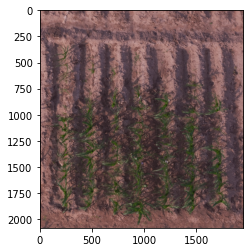

In [ ]:
f_i = 2 # the folder name
im_j = 2 # the image name (the grid number)
file_nc_list_i = glob.glob(os.path.join(folder_nc_path, folder_nc_list[f_i], "*_{}.png".format(im_j)))
print(file_nc_list_i[0])

M_data_0 = cv2.imread(file_nc_list_i[0])#[:500, 0:500,:] # normalize the image to 0-1 range

print(M_data_0.shape)
#
plt.figure()
plt.imshow(M_data_0[:,:,[2,1,0]])
plt.show()

In [ ]:
folder_tc_path = "/content/drive/My Drive/maize_rice_ortho_tcRGB_rotated_grids_cropped"
folder_tc_list = os.listdir(folder_tc_path)
folder_tc_list.sort()
print(folder_tc_list)
print("")
#
for i in range(len(folder_tc_list)):
    print(folder_tc_list[i])
    file_tc_list_i = os.listdir(os.path.join(folder_tc_path, folder_tc_list[i]))
    file_tc_list_i.sort()
    print(file_tc_list_i)
    print("")

['maize_20181030_tcRGB_grids_cropped', 'maize_20181109_tcRGB_grids_cropped', 'maize_20181119_tcRGB_grids_cropped', 'maize_20181220_tcRGB_grids_cropped', 'maize_20191109_tcRGB_grids_cropped', 'maize_20191122_tcRGB_grids_cropped', 'maize_20191220_tcRGB_grids_cropped', 'rice_20180821_tcRGB_grids_cropped', 'rice_20180927_tcRGB_grids_cropped', 'rice_20181026_tcRGB_grids_cropped', 'rice_20181124_tcRGB_grids_cropped']

maize_20181030_tcRGB_grids_cropped
['maize_20181030_ortho_5bands_ortho_multi_rotated_grids_0.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_1.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_10.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_11.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_12.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_13.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_14.png', 'maize_20181030_ortho_5bands_ortho_multi_rotated_grids_15.png', 'maize_20181030_ortho_5bands_ortho_mul

In [ ]:
f_i = 2 # the folder name
im_j = 2 # the image name (the grid number)
file_tc_list_i = glob.glob(os.path.join(folder_tc_path, folder_tc_list[f_i], "*_{}.png".format(im_j)))
print(file_tc_list_i[0])

/content/drive/My Drive/maize_rice_ortho_tcRGB_rotated_grids_cropped/maize_20181119_tcRGB_grids_cropped/maize_20181119_ortho_5bands_ortho_multi_rotated_grids_2.png


/content/drive/My Drive/maize_rice_ortho_tcRGB_rotated_grids_cropped/maize_20181119_tcRGB_grids_cropped/maize_20181119_ortho_5bands_ortho_multi_rotated_grids_2.png
(655, 618, 3)


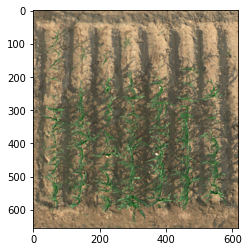

In [ ]:
f_i = 2 # the folder name
im_j = 2 # the image name (the grid number)
file_tc_list_i = glob.glob(os.path.join(folder_tc_path, folder_tc_list[f_i], "*_{}.png".format(im_j)))
print(file_tc_list_i[0])

H_data_0 = cv2.imread(file_tc_list_i[0])#[:500, 0:500,:] # normalize the image to 0-1 range

print(H_data_0.shape)
#
plt.figure()
plt.imshow(H_data_0[:,:,[2,1,0]])
plt.show()

In [ ]:
##.                   initiate all the networks
end_epoch = 300000
hsize = 9
LR_spc_dn = 1e-3
encoder_lr = 1e-3
mine_lr = 1e-3
decoder_lr = 1e-3
affine_x_lr = 1e-3
#
encoder = encoder_lr_hsi_py().cuda().float()
optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=encoder_lr, weight_decay=1e-4)
#
decoder = decoder_hsi_py().cuda() 
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.1)
decoder.apply(init_weights)
optimizer_decoder = torch.optim.Adam(decoder.parameters(), lr=decoder_lr, weight_decay=1e-4)
###
dtype = torch.cuda.FloatTensor
#
from torch.autograd import Variable
mse = torch.nn.MSELoss().type(dtype)


In [ ]:
# first only learn the abundance and endmember of HR-RGB, until fully convergence

#                                            PART I.  
start_ep = 0
LR = 1e-3
# control whether to include SID loss in style image decomposition
sid_cef = 100 # can be either 0 or 100

######################################
#
end_epoch = 35000001

encoder_lr =  LR
decoder_lr = LR
mine_lr = LR
#
loss_save_mrae = np.inf
loss_save_sam = np.inf
loss_save_ergas = np.inf
loss_save_psnr = 0
# file_tc_list_i[0]
folder_nc_path = "/content/drive/My Drive/maize_rice_ortho_realRGB_rotated_grids_cropped"
folder_nc_list = os.listdir(folder_nc_path)
folder_nc_list.sort()
#
f_i = 2 # the folder name
im_j = 8 # the image name (the grid number)
#
file_nc_list_i = glob.glob(os.path.join(folder_nc_path, folder_nc_list[f_i], "*_{}.png".format(im_j)))
print(file_nc_list_i[0])
M_data_0 = cv2.imread(file_nc_list_i[0])
l_h_size = int(M_data_0.shape[0]/ 2)
l_w_size = int(M_data_0.shape[1]/ 2)
M_data = (cv2.resize(M_data_0, (l_w_size, l_h_size), interpolation = cv2.INTER_AREA)/255.0)
h_h_size = M_data.shape[0]
h_w_size = M_data.shape[1]
##
###########################
#
input_hr_msi_raw = torch.tensor(M_data, dtype = torch.float32).reshape(M_data.shape[0]*M_data.shape[1], M_data.shape[2])
input_hr_msi_raw_mean = input_hr_msi_raw.mean(0,keepdim = True)
input_hr_msi = input_hr_msi_raw - input_hr_msi_raw_mean
###########################

##
for j in range(start_ep, end_epoch): 
    LR_spc_dn = LR
    mine_lr = LR
    encoder_lr = LR
    # load the data 
    optimizer_decoder = torch.optim.Adam(decoder.parameters(), lr=decoder_lr, weight_decay=1e-4)
    optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=encoder_lr, weight_decay=1e-4)
    ##
    optimizer_encoder.zero_grad()
    optimizer_decoder.zero_grad()
    #
    #
    input_hr_msi_var = Variable(input_hr_msi.cuda(), requires_grad = True)

    #
    out_HR_rgb_v = encoder(input_hr_msi_var)
    out_HR_rgb_v = out_HR_rgb_v.clamp(1e-8, 1e+8)
    # apply sum to one constraints
    out_HR_rgb_s = get_stick_segments(out_HR_rgb_v)
    out_HR_rgb_s = out_HR_rgb_s.clamp(1e-8, 1.0-1e-8)
    entropy_loss = Entropy_loss(out_HR_rgb_s)
    #
    #####. decoder
    # non negative
    decoder.conv31.weight.data = decoder.conv31.weight.data.clamp(-1 + 1e-8, 1 - 1e-8)
    # here decoder is to generate HR RGB image directly
    out_HR_img_de = decoder(out_HR_rgb_s) # 3, 15, 15, 31
    out_HR_img_de = out_HR_img_de.clamp(-1+ 1e-8, 1.0-1e-8)
    #
    #. add cycle consistancy loss here
    loss_de_msi = l_2_1_loss(input_hr_msi_var + torch.tensor(1e-8).cuda(), out_HR_img_de) #.type(dtype) # l_2_1_loss loss between reconstructed LR-HSI and GroundTruth LR-HSI
    sid_de_msi = sid_loss_gen(input_hr_msi_var + torch.tensor(1.0 +1e-8).cuda(), out_HR_img_de + torch.tensor(1.0 +1e-8).cuda()) #.type(dtype) # l_2_1_loss loss between reconstructed LR-HSI and GroundTruth LR-HSI
    sam_de_msi = sam_ev_gen(input_hr_msi_var + torch.tensor(1e-8).cuda(), out_HR_img_de).type(dtype)
    psnr_de_msi = psnr_ev_gen(input_hr_msi_var + torch.tensor(1e-8).cuda(), out_HR_img_de).type(dtype)
    ergas_de_msi = ergas_loss_gen(input_hr_msi_var+ torch.tensor(1e-8).cuda(), out_HR_img_de+ torch.tensor(1e-8).cuda(),1, torch.tensor(1e-8).cuda()).type(dtype)
    ##
    ##   final loss from the decoder
    loss_de = 1.0*loss_de_msi #+ 0.9*loss_lr_de_msi
    loss_de_sid = 1.0*sid_de_msi #+ 0.9*sid_lr_de_msi
    loss_de_sam = 1.0*sam_de_msi #+ 0.9*sid_lr_de_msi
    loss_de_pnsr = 1.0*psnr_de_msi #+ 0.9*psnr_lr_de_msi
    loss_de_ergas = 1.0*ergas_de_msi #+ 0.9*psnr_lr_de_msi

    #
    decoder_op = decoder.conv31.weight.data.transpose(0,1) 
    decoder_op_n = (decoder_op) + input_hr_msi_var.mean(0)
    hsi_volume_loss = Geometric_loss(decoder_op_n)
    smoothness_loss = Entropy_loss(decoder_op_n)
    #smoothness_loss = smoothness(decoder_op)
    dissimilarity_loss = Entropy_loss(decoder_op_n.transpose(0,1))
    #. add entropy loss on spectral response function here

    loss_de_final = 10*loss_de + sid_cef*loss_de_sid + 0.01*entropy_loss 
    #
    loss_out_mrae = loss_de_msi.item()
    loss_out_sid = loss_de_sid.item()

    ##
    print("current epoch {}".format(j))
    if loss_save_mrae > loss_out_mrae:
        loss_save_mrae = loss_out_mrae
        loss_save_mrae_sid = loss_out_sid

        lr_save_mrae = LR
        j_save_mrae = j
        #
        print("Saving MRAE {}".format(loss_save_mrae))
        print("saving MRAE: {}, sam: {}, psnr: {}, ergas: {} epoch: {}, lr: {} ".format(loss_save_mrae, loss_save_mrae_sid, j_save_mrae, lr_save_mrae))
        # CONSTRAINTS on encoder
        save_checkpoint_sp(os.getcwd(), 10000, lr_save_mrae, "encoder_MaizeRice_CE_9_endmember_mrae_js1_f_{}_img_{}".format(f_i,im_j), encoder, optimizer_encoder) # 32233 is good enough
        save_checkpoint_sp(os.getcwd(), 10000, lr_save_mrae,"decoder_MaizeRice_CE_9_endmember_mrae_js1_f_{}_img_{}".format(f_i,im_j), decoder, optimizer_decoder)
    print("MRAE: last saved mrae: {}, sam: {}, psnr: {}, ergas: {} at epoch: {} and lr:{}".format(loss_save_mrae, loss_save_mrae_sam, loss_save_mrae_psnr,loss_save_mrae_ergas, j_save_mrae, lr_save_mrae))
    ####
    loss_de_final.backward()
    #
    optimizer_encoder.step()
    optimizer_decoder.step()
    # Log
    if j % 100 == 0:
        #
        print("epoch {}, LR {}".format(j, LR))
        #########
        #
        print("loss_de {}".format(loss_de.item()))
        print("loss_de_sid {}".format(loss_de_sid.item()))
        print("entropy_loss: {}".format(entropy_loss.item()))
        #
        #out_LR_spa
        input_hr_msi_np = M_data 
        out_HR_rgb_np = (out_HR_img_de.detach().cpu().squeeze() + input_hr_msi_raw_mean).numpy().reshape(h_h_size,h_w_size,3) 
        #
        out_1 = input_hr_msi_np[:,:,:] 
        i_min = np.quantile(out_1[out_1!=0].flatten(), 0.00001)
        i_max = np.quantile(out_1[out_1!=0].flatten(), 0.99999)
        # improve teh image contrast
        out_1_x = np.zeros((out_1.shape), dtype=np.float32 )
        for i in range(3):
            rgb_x_i = out_1[:,:,i]
            out_1_x[:,:,i] = (rgb_x_i - i_min)/(i_max-i_min)
            out_1_x[out_1_x<0] = 0
            out_1_x[out_1_x>1] = 1
        #
        out_2 = out_HR_rgb_np[:,:,:] 
        i_min = np.quantile(out_2[out_2!=0].flatten(), 0.000000001)
        i_max = np.quantile(out_2[out_2!=0].flatten(), 0.999999999)
        # improve teh image contrast
        out_2_x = np.zeros((out_2.shape), dtype=np.float32 )
        for i in range(3):
            rgb_x_i = out_2[:,:,i]
            out_2_x[:,:,i] = (rgb_x_i - i_min)/(i_max-i_min)
            out_2_x[out_2_x<0] = 0
            out_2_x[out_2_x>1] = 1
        # plot the ground truth and output
        figure, axarr = plt.subplots(nrows=1,ncols=2, figsize=(6,4))
        plt.sca(axarr[0]); 
        plt.imshow(out_1_x[:,:,[2,1,0]]); plt.title("HR_rgb_gt,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[1]); 
        plt.imshow(out_2_x[:,:,[2,1,0]]); plt.title("HR_rgb_rec,E_{}".format(j)) # HR_HSI
        figure.tight_layout()
        plt.show()        #
        ##.   error maps
        # mrae map
        hr_mrae_map = mrae_loss_gen_map(input_hr_msi_var.cuda() + torch.tensor(1e-8).cuda(), out_HR_img_de).detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size)
        hr_mrae_map[hr_mrae_map>1.0] = 1.0
        # sam map
        hr_sam_map = sam_ev_gen_map(input_hr_msi_var.cuda(), out_HR_img_de).detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size)
        # psnr map
        hr_psnr_map = psnr_ev_gen_map(input_hr_msi_var.cuda(), out_HR_img_de).detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size)
        #
        figure, axarr = plt.subplots(nrows=1,ncols=3, figsize=(8,3))
        plt.sca(axarr[0]); 
        plt.imshow(hr_mrae_map); plt.title("hr_mrae_map,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[1]); 
        plt.imshow(hr_sam_map); plt.title("hr_sam_map,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[2]); 
        plt.imshow(hr_psnr_map); plt.title("hr_psnr_map,E_{}".format(j)) #out_HR_HSI
        figure.tight_layout()
        plt.show()        #
        # plot abundance map (randomly select 6 pixels for visualization)
        out_HR_rgb_s_np = out_HR_rgb_s.detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size,hsize)
        #s_number = Rand(0, hsize-1, 8)
        #
        figure, axarr = plt.subplots(nrows=1,ncols=9, figsize=(22,4))
        for x in range(9):
            plt.sca(axarr[x]); 
            plt.imshow(out_HR_rgb_s_np[:,:,x]); plt.title("Abundance HR,B{},E{}".format(x,j)) # HR_HSI
        figure.tight_layout()
        plt.show()        #
        print("")
        ## visualize the smoothed endmembers
        x =np.linspace(400, 700, 3, endpoint=True) 
        plt.figure(figsize=(9,6))
        for i in range(hsize):
            y_i = decoder.conv31.weight.data.transpose(0,1).cpu().detach().numpy()[i,:]
            plt.plot(x, y_i, label = "ref {}".format(i))
        plt.show()
    
    if (j +1) % 100 == 0:
        LR = LR* 0.98
    if (j+1) % 250 ==0:
        clear_output()

current epoch 4250
Saving MRAE 1705.3563232421875
saving MRAE: 1705.3563232421875, sam: 0.7843378186225891, psnr: 60.752864837646484, ergas: 1463.166015625 epoch: 4250, lr: 4.2805066795449306e-07 
MRAE: last saved mrae: 1705.3563232421875, sam: 0.7843378186225891, psnr: 60.752864837646484, ergas: 1463.166015625 at epoch: 4250 and lr:4.2805066795449306e-07
current epoch 4251
MRAE: last saved mrae: 1705.3563232421875, sam: 0.7843378186225891, psnr: 60.752864837646484, ergas: 1463.166015625 at epoch: 4250 and lr:4.2805066795449306e-07
current epoch 4252
Saving MRAE 1705.35400390625
saving MRAE: 1705.35400390625, sam: 0.7843248844146729, psnr: 60.752769470214844, ergas: 1463.16064453125 epoch: 4252, lr: 4.2805066795449306e-07 
MRAE: last saved mrae: 1705.35400390625, sam: 0.7843248844146729, psnr: 60.752769470214844, ergas: 1463.16064453125 at epoch: 4252 and lr:4.2805066795449306e-07
current epoch 4253
MRAE: last saved mrae: 1705.35400390625, sam: 0.7843248844146729, psnr: 60.752769470214

KeyboardInterrupt: ignored

In [ ]:
# confirm the which image is used
print(f_i)
print(im_j)

2
8


In [ ]:
#.       fine-tuned weights 
#
resume_encoder = os.path.join(os.getcwd(), 'unsupervised_CRF_learning_encoder_MaizeRice_CE_9_endmember_mrae_js1_f_{}_img_{}.pth'.format(f_i, im_j))
resume_decoder = os.path.join(os.getcwd(), 'unsupervised_CRF_learning_decoder_MaizeRice_CE_9_endmember_mrae_js1_f_{}_img_{}.pth'.format(f_i, im_j))
###
checkpoint_encoder = torch.load(resume_encoder)
start_epoch = checkpoint_encoder['epoch']
LR_tr = checkpoint_encoder['lr']
encoder.load_state_dict(checkpoint_encoder['state_dict'])
optimizer_encoder.load_state_dict(checkpoint_encoder['optimizer'])
##
checkpoint_decoder = torch.load(resume_decoder)
start_epoch = checkpoint_decoder['epoch']
LR_tr = checkpoint_decoder['lr']
decoder.load_state_dict(checkpoint_decoder['state_dict'])
optimizer_decoder.load_state_dict(checkpoint_decoder['optimizer'])

In [ ]:
class L_Dspec_n_or(nn.Module):
    def __init__(self):
        super(L_Dspec_n_or, self).__init__()
        self.conv11 = nn.Linear(3,3, bias = False)
    def forward(self,x):
        out = self.conv11(x)
        return out


In [ ]:
#
down_spc_or = L_Dspec_n_or().cuda().float() 
optimizer_spc_or_dn = torch.optim.Adam(down_spc_or.parameters(), lr=LR_spc_dn, weight_decay=1e-4)

### run this chunk only when you want to load the trained model weights 

In [ ]:
###           fine-tuned weights
i_x = 10000 
resume_down_spc_or = os.path.join(os.getcwd(), "unsupervised_CRF_learning_down_spc_or_MaizeRice_1_CE_9_endmember_Abundanceloss_residual_loss_js1_{}_img_{}_1.pth".format(f_i, im_j))
###
checkpoint_down_spc_or = torch.load(resume_down_spc_or)
start_epoch = checkpoint_down_spc_or['epoch']
LR_tr = checkpoint_down_spc_or['lr']
down_spc_or.load_state_dict(checkpoint_down_spc_or['state_dict'])
optimizer_spc_or_dn.load_state_dict(checkpoint_down_spc_or['optimizer'])

epoch 13500, LR 4.9307462061807795e-05
style_abundance_loss 0.002708344254642725
style_ergas_loss 134.916748046875
style_abundance_sam_loss 1.5151374340057373
loss_de_msi 5772.7041015625
style_abundance_sam_loss_t 2.5518252849578857

loss_de_msi 5772.7041015625
loss_de_sid_msi 2.1344414562918246e-05


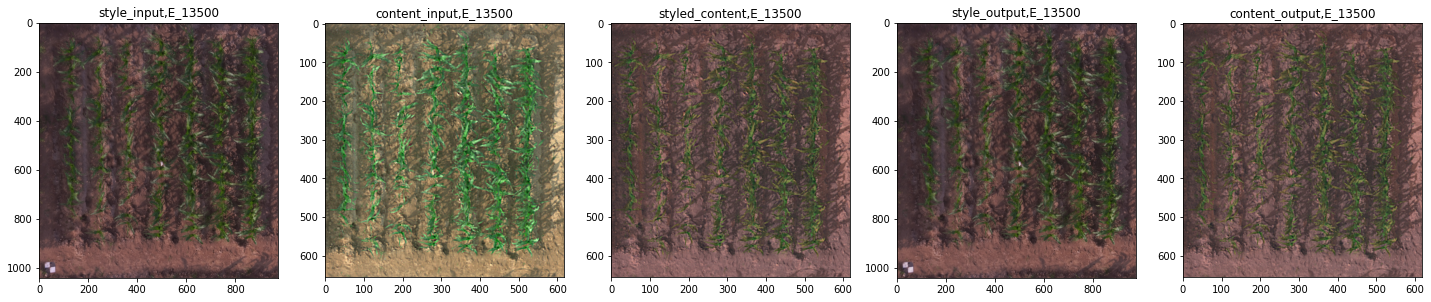

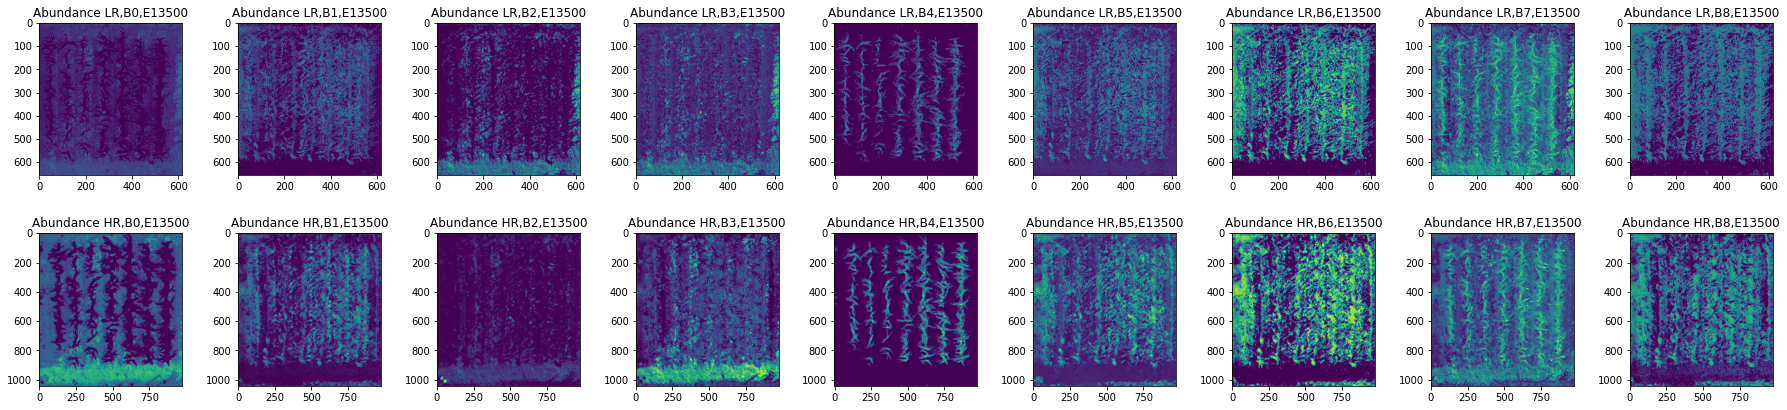


showing every epoch when there is something to save
Updating loss 2095.827392578125 at epoch of 13504
saving Loss: 2095.827392578125, mrae:0.002707807347178459, sam: 1.5150824785232544, ergas: 134.87791442871094, epoch: 13504, lr: 4.9307462061807795e-05 
showing every epoch when there is something to save
Updating loss 2095.7734375 at epoch of 13506
saving Loss: 2095.7734375, mrae:0.0027081426233053207, sam: 1.5150036811828613, ergas: 134.90020751953125, epoch: 13506, lr: 4.9307462061807795e-05 
showing every epoch when there is something to save
Updating loss 2095.748046875 at epoch of 13513
saving Loss: 2095.748046875, mrae:0.002709409222006798, sam: 1.51504647731781, ergas: 134.95245361328125, epoch: 13513, lr: 4.9307462061807795e-05 
showing every epoch when there is something to save
Updating loss 2095.7255859375 at epoch of 13517
saving Loss: 2095.7255859375, mrae:0.0027090266812592745, sam: 1.5149716138839722, ergas: 134.94223022460938, epoch: 13517, lr: 4.9307462061807795e-05 

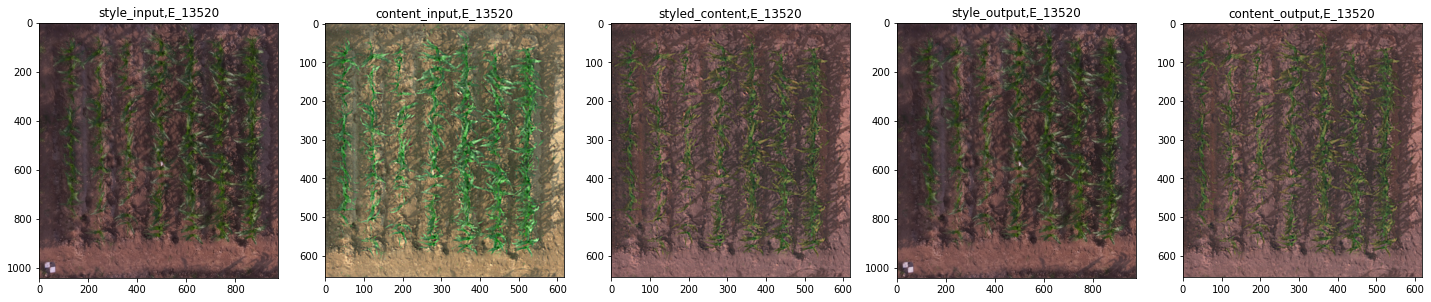

KeyboardInterrupt: ignored

In [ ]:
#
f_i = 2 # the folder name
im_j = 8 # the image name (the grid number)

# still taking advantage of the trained encoder, decoder, and mutual inforamtion (don't initiate from randam values)
LR = 1e-3 
#
end_epoch = 35000001
#LR = 0.0003869239008481976
#
encoder_lr =  LR
decoder_lr = LR
mine_lr = LR
affine_x_lr = LR
#
#
loss_save_loss = np.inf
loss_save_mrae = np.inf
loss_save_sam = np.inf
loss_save_psnr = 0
mutual_loss_save = np.inf
#
##
folder_tc_path = "/content/drive/My Drive/maize_rice_ortho_tcRGB_rotated_grids_cropped"
folder_tc_list = os.listdir(folder_tc_path)
folder_tc_list.sort()
#
file_tc_list_i = glob.glob(os.path.join(folder_tc_path, folder_tc_list[f_i], "*_{}.png".format(im_j)))
print(file_tc_list_i[0])
#
H_data_0 = cv2.imread(file_tc_list_i[0])#[:500, 0:500,:] # normalize the image to 0-1 range
#
h_h_size = int(H_data_0.shape[0]/ 1)
h_w_size = int(H_data_0.shape[1]/ 1)
H_data = (cv2.resize(H_data_0, (h_w_size, h_h_size), interpolation = cv2.INTER_AREA)/255.0)#[300:1100, 1400:2400,:]
##
input_lr_hsi_raw = torch.tensor(H_data.reshape(H_data.shape[0]*H_data.shape[1], H_data.shape[2])).float()
input_lr_hsi_raw_mean = input_lr_hsi_raw.mean(0,keepdim = True)
input_lr_hsi = input_lr_hsi_raw -input_lr_hsi_raw_mean
#
folder_nc_path = "/content/drive/My Drive/maize_rice_ortho_realRGB_rotated_grids_cropped"
folder_nc_list = os.listdir(folder_nc_path)
folder_nc_list.sort()
#
# f_i = 0 # the folder name
# im_j = 2 # the image name (the grid number)
#
file_nc_list_i = glob.glob(os.path.join(folder_nc_path, folder_nc_list[f_i], "*_{}.png".format(im_j)))
print(file_nc_list_i[0])
##
M_data_0 = cv2.imread(file_nc_list_i[0])#[:500, 0:500,:] # normalize the image to 0-1 range
l_h_size = int(M_data_0.shape[0]/ 2)
l_w_size = int(M_data_0.shape[1]/ 2)
M_data = (cv2.resize(M_data_0, (l_w_size, l_h_size), interpolation = cv2.INTER_AREA)/255.0)#[300:1100, 1400:2400,:]
##
input_hr_msi_raw = torch.tensor(M_data.reshape(M_data.shape[0]*M_data.shape[1], M_data.shape[2])).float()
input_hr_msi_raw_mean = input_hr_msi_raw.mean(0,keepdim = True)
input_hr_msi = input_hr_msi_raw - input_hr_msi_raw_mean
##
for j in range(start_epoch, end_epoch): 
    LR_spc_dn = LR
    mine_lr = LR
    encoder_lr = LR
    # load the data 
    optimizer_spc_or_dn = torch.optim.Adam(down_spc_or.parameters(), lr=LR_spc_dn*0.5, weight_decay=1e-4)
    #
    optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=encoder_lr*0.01, weight_decay=1e-4)
    optimizer_decoder = torch.optim.Adam(decoder.parameters(), lr=decoder_lr*0.01, weight_decay=1e-4)
    #
    ##
    optimizer_spc_or_dn.zero_grad()
    optimizer_encoder.zero_grad()
    optimizer_decoder.zero_grad()
    #
    input_lr_hsi_var = Variable(input_lr_hsi.cuda(), requires_grad = True)
    #
    #with torch.no_grad():
    input_lr_msi_var = down_spc_or(input_lr_hsi_var) #Variable(input_lr_hsi.cuda(), requires_grad = True) #
    input_lr_msi_var = input_lr_msi_var.clamp(-1.0+1e-8, 1.0-1e-8)
    #
    entropy_loss_input_lr_msi = Entropy_loss(input_lr_msi_var)
    # create one randomly shuffled image of rgb
    rand_hsi_ind=torch.randperm(input_lr_msi_var.size()[0])
    input_lr_msi_p=input_lr_msi_var.clone()[rand_hsi_ind[:], :]
    input_lr_msi_p_var = Variable(input_lr_msi_p.cuda(), requires_grad = True)
    #####
    out_LR_img_v = encoder(input_lr_msi_var) # directly downsample it to the same resolution as HSI's
    out_LR_img_v = out_LR_img_v.clamp(1e-8, 1e+8)
    # apply sum to one constraints
    out_LR_img_s = get_stick_segments(out_LR_img_v)
    out_LR_img_s = out_LR_img_s.clamp(1e-8, 1.0-1e-8)
    ##
    entropy_loss_LR_img = Entropy_loss(out_LR_img_s)

    #        natural RGB
    input_hr_msi_var = Variable(input_hr_msi.cuda(), requires_grad = True)
    # create one randomly shuffled image of rgb
    rand_msi_ind=torch.randperm(input_hr_msi.size()[0])
    input_hr_msi_p=input_hr_msi.clone()[rand_msi_ind[:], :]
    input_hr_msi_p_var = Variable(input_hr_msi_p.cuda(), requires_grad = True)
    #
    # Load the observed HR RGB (high resolution RGB should always be the premise for HSI super-resolution due to RGB images' wide availability)
    ### msi part
    out_HR_rgb_v = encoder(input_hr_msi_var)
    out_HR_rgb_v = out_HR_rgb_v.clamp(1e-8, 1e+8)
    #
    out_HR_rgb_s = get_stick_segments(out_HR_rgb_v)
    out_HR_rgb_s = out_HR_rgb_s.clamp(1e-8, 1.0-1e-8)
    #
    entropy_loss_HR_rgb = Entropy_loss(out_HR_rgb_s)
    #
    entropy_loss = entropy_loss_LR_img + entropy_loss_HR_rgb

    ###################
    #.                    decoder 
    # here decoder is to generate LR RGB image directly
    out_LR_img_de = decoder(out_LR_img_s) # 3, 15, 15, 31
    out_LR_img_de = out_LR_img_de.clamp(-1+ 1e-8, 1.0-1e-8)
    # # input rgb_input vs rgb_output
    loss_de_lr_msi = l_2_1_loss(input_lr_msi_var + torch.tensor(1e-8).cuda(),out_LR_img_de)
    sid_de_lr_msi = sid_loss_gen(input_lr_msi_var + torch.tensor(1+1e-8).cuda(), out_LR_img_de + torch.tensor(1+1e-8).cuda())
    sam_de_lr_msi = sam_ev_gen(input_lr_msi_var + torch.tensor(1e-8).cuda(), out_LR_img_de)
    psnr_de_lr_msi = psnr_ev_gen(input_lr_msi_var + torch.tensor(1e-8).cuda(), out_LR_img_de)#.type(dtype)
    ##############
    # 
    out_HR_rgb_de = decoder(out_HR_rgb_s) # 3, 15, 15, 31. # 
    out_HR_rgb_de = out_HR_rgb_de.clamp(-1+ 1e-8, 1.0-1e-8)
    # # input rgb_input vs rgb_output
    loss_de_hr_msi = l_2_1_loss(input_hr_msi_var + torch.tensor(1e-8).cuda(),out_HR_rgb_de)
    sid_de_hr_msi = sid_loss_gen(input_hr_msi_var + torch.tensor(1.0 + 1e-8).cuda(), out_HR_rgb_de + torch.tensor(1.0 + 1e-8).cuda())
    sam_de_hr_msi = sam_ev_gen(input_hr_msi_var + torch.tensor(1e-8).cuda(), out_HR_rgb_de)
    psnr_de_hr_msi = psnr_ev_gen(input_hr_msi_var + torch.tensor(1e-8).cuda(), out_HR_rgb_de)#.type(dtype)
    ##
    loss_de_msi = loss_de_hr_msi + 5*loss_de_lr_msi # 
    loss_de_sid_msi =  sid_de_hr_msi + 5*sid_de_lr_msi #
    #
    decoder_op = decoder.conv31.weight.data.transpose(0,1) #torch.matmul(decoder.conv31.weight.data,decoder.conv32.weight.data.transpose(0,1))
    decoder_op_hr_msi = (decoder_op) + input_hr_msi_var.sum(0)
    hsi_volume_loss_hr_msi = Geometric_loss(decoder_op_hr_msi)
    #
    decoder_op_lr_msi = (decoder_op) + input_lr_msi_var.sum(0)
    hsi_volume_loss_lr_msi = Geometric_loss(decoder_op_lr_msi)
    #
    hsi_volume_loss_msi = hsi_volume_loss_hr_msi + hsi_volume_loss_lr_msi

    ##.  gram matrix on abundances 
    out_HR_rgb_s_gram_matrix = torch.mm(out_HR_rgb_s.transpose(0,1), out_HR_rgb_s)/(out_HR_rgb_s.size()[0])*1
    out_HR_rgb_s_gram_matrix_n = out_HR_rgb_s_gram_matrix- out_HR_rgb_s_gram_matrix.mean(0,keepdim = True)
    
    out_LR_img_s_gram_matrix = torch.mm(out_LR_img_s.transpose(0,1), out_LR_img_s)/(out_LR_img_s.size()[0])*1
    out_LR_img_s_gram_matrix_n = out_LR_img_s_gram_matrix- out_LR_img_s_gram_matrix.mean(0,keepdim = True)
    ## abundance loss
    style_abundance_loss = l_2_1_loss(out_HR_rgb_s_gram_matrix_n, out_LR_img_s_gram_matrix_n)
    style_abundance_sam_loss = sam_ev_gen(out_HR_rgb_s_gram_matrix_n, out_LR_img_s_gram_matrix_n)
    style_ergas_loss = ergas_loss_gen(out_HR_rgb_s_gram_matrix_n, out_LR_img_s_gram_matrix_n, 1, torch.tensor(1e-8).cuda())
    
    #
    loss_de_final_multi =  1*style_abundance_loss + 10*style_abundance_sam_loss  + 0.01*entropy_loss 
    loss_de_final = 0.1*loss_de_msi   +100*loss_de_final_multi 
    ##
    loss_de_loss = loss_de_final.item()
    loss_out_mrae = style_abundance_loss.item()
    loss_out_ergas = style_ergas_loss.item()
    loss_out_sam = style_abundance_sam_loss.item()
    ##
    if loss_save_loss > loss_de_loss: 
        loss_save_loss = loss_de_loss
        loss_save_loss_mrae = loss_out_mrae
        loss_save_loss_sam = loss_out_sam
        loss_save_loss_ergas = loss_out_ergas
        lr_save_loss = LR
        j_save_loss = j
        #
        print("showing every epoch when there is something to save")
        print("Updating loss {} at epoch of {}".format(loss_save_loss, j))
        print("saving Loss: {}, mrae:{}, sam: {}, ergas: {}, epoch: {}, lr: {} ".format(loss_save_loss, loss_save_loss_mrae, loss_save_loss_sam, loss_save_loss_ergas, j_save_loss, lr_save_loss))
        # CONSTRAINTS on encoder
        save_checkpoint_sp(os.getcwd(), 10000, lr_save_loss, "down_spc_or_MaizeRice_1_CE_9_endmember_Abundanceloss_residual_loss_js1_{}_img_{}_1".format(f_i, im_j), down_spc_or, optimizer_spc_or_dn)
    ####
    loss_de_final.backward()
    #
    optimizer_spc_or_dn.step()
    if j % 20 == 0:
        print("epoch {}, LR {}".format(j, LR))
        #########

        print("style_abundance_loss {}".format(style_abundance_loss.item()))
        print("style_ergas_loss {}".format(style_ergas_loss.item()))
        print("style_abundance_sam_loss {}".format(style_abundance_sam_loss.item()))
        #
        print("loss_de_msi {}".format(loss_de_msi.item()))
        print("style_abundance_sam_loss_t {}".format(style_abundance_sam_loss_t.item()))
        print("")
        print("loss_de_msi {}".format(loss_de_msi.item()))
        print("loss_de_sid_msi {}".format(loss_de_sid_msi.item()))
        # visualize the output
        input_lr_msi_np = input_lr_msi_var.detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size,3) + input_hr_msi_raw_mean.unsqueeze(0).numpy()*1.2
        out_HR_rgb_np = out_HR_rgb_de.detach().cpu().squeeze().numpy().reshape(l_h_size,l_w_size,3)  + input_hr_msi_raw_mean.unsqueeze(0).numpy()
        out_LR_img_de_np = out_LR_img_de.detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size,3)  + input_hr_msi_raw_mean.unsqueeze(0).numpy()*1.2
        #
        out_1 = input_lr_msi_np[:,:,:] 
        out_1[out_1>1] = 1
        out_1[out_1<0] = 0
        # content input
        out_2 = out_HR_rgb_np[:,:,:] 
        out_2[out_2>1] = 1
        out_2[out_2<0] = 0
        #
        out_3 = out_LR_img_de_np[:,:,:]
        out_3[out_3>1] = 1
        out_3[out_3<0] = 0
        # plot the ground truth and output
        figure, axarr = plt.subplots(nrows=1,ncols=5, figsize=(20,5))
        plt.sca(axarr[0]); 
        plt.imshow(M_data[:,:,[2,1,0]]); plt.title("style_input,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[1]); 
        plt.imshow(H_data[:,:,[2,1,0]]); plt.title("content_input,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[2]); 
        plt.imshow(out_1[:,:,[2,1,0]]); plt.title("styled_content,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[3]); 
        plt.imshow(out_2[:,:,[2,1,0]]); plt.title("style_output,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[4]); 
        plt.imshow(out_3[:,:,[2,1,0]]); plt.title("content_output,E_{}".format(j)) # HR_HSI
        figure.tight_layout()
        plt.show()        #
        #
        # plot abundance map (randomly select 6 pixels for visualization)
        out_LR_img_s_np = out_LR_img_s.detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size,hsize)
        out_HR_rgb_s_np = out_HR_rgb_s.detach().cpu().squeeze().numpy().reshape(l_h_size,l_w_size,hsize)
        #s_number = Rand(0, hsize-1, 8)
        #
        figure, axarr = plt.subplots(nrows=2,ncols=9, figsize=(25,6))
        for x in range(9):
            plt.sca(axarr[0,x]); 
            plt.imshow(out_LR_img_s_np[:,:,x]); plt.title("Abundance LR,B{},E{}".format(x,j)) # HR_HSI
            plt.sca(axarr[1,x]); 
            plt.imshow(out_HR_rgb_s_np[:,:,x]); plt.title("Abundance HR,B{},E{}".format(x,j)) # HR_HSI
        figure.tight_layout()
        plt.show()        #
        print("")
        #
    if (j +1) % 100 == 0:
        LR = LR* 0.98
        print("LR_gen: {}, epoch {}".format(LR, j))
    if (j +1) % 250 == 0:
        clear_output()

In [ ]:
##.                   initiate all the networks
hsize = 9
#
encoder = encoder_lr_hsi_py().cuda().float()
optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=encoder_lr, weight_decay=1e-4)
##
decoder = decoder_hsi_py().cuda() #decoder_msi_py(lr_decoder_w1,lr_decoder_w2).cuda()
optimizer_decoder = torch.optim.Adam(decoder.parameters(), lr=decoder_lr, weight_decay=1e-4)
##
down_spc_or = L_Dspec_n_or().cuda().float() 
optimizer_spc_or_dn = torch.optim.Adam(down_spc_or.parameters(), lr=LR_spc_dn, weight_decay=1e-4)
#
dtype = torch.cuda.FloatTensor

In [ ]:
# recap which images was used to find the correct mapping function 
folder_tc_path = "/content/drive/My Drive/maize_rice_ortho_tcRGB_rotated_grids_cropped"
folder_tc_list = os.listdir(folder_tc_path)
folder_tc_list.sort()
#
f_i = 2 # the folder name
im_j = 8 # the image name (the grid number)
#
file_tc_list_i = glob.glob(os.path.join(folder_tc_path, folder_tc_list[f_i], "*_{}.png".format(im_j)))
print(file_tc_list_i[0])

/content/drive/My Drive/maize_rice_ortho_tcRGB_rotated_grids_cropped/maize_20181119_tcRGB_grids_cropped/maize_20181119_ortho_5bands_ortho_multi_rotated_grids_8.png


In [ ]:
resume_encoder = os.path.join(os.getcwd(), 'unsupervised_CRF_learning_encoder_MaizeRice_CE_9_endmember_mrae_js1_f_2_img_8.pth')
resume_decoder = os.path.join(os.getcwd(), 'unsupervised_CRF_learning_decoder_MaizeRice_CE_9_endmember_mrae_js1_f_2_img_8.pth')
resume_down_spc_or = os.path.join(os.getcwd(), 'unsupervised_CRF_learning_down_spc_or_MaizeRice_1_CE_9_endmember_Abundanceloss_residual_loss_js1_2_img_8_1.pth')
###
checkpoint_encoder = torch.load(resume_encoder)
encoder.load_state_dict(checkpoint_encoder['state_dict'])
#
checkpoint_decoder = torch.load(resume_decoder)
decoder.load_state_dict(checkpoint_decoder['state_dict'])
#
checkpoint_down_spc_or = torch.load(resume_down_spc_or)
down_spc_or.load_state_dict(checkpoint_down_spc_or['state_dict'])
##
decoder.eval()
encoder.eval()
down_spc_or.eval()

L_Dspec_n_or(
  (conv11): Linear(in_features=3, out_features=3, bias=False)
)

## Convert tcRGB images to ncRGB ones

In [ ]:
##
data_path = '/content/drive/My Drive/Maize2018_ortho_rgb_cropped_04052021'
data_path_out = '/content/drive/My Drive/Maize2018_ortho_rgb_cropped_04052021_NEW'
#
fld_list = os.listdir(data_path) 
fld_list.sort()
for fl in range(len(fld_list)):
    fld_list_fl = os.path.join(data_path, fld_list[fl])
    #
    fld_list_fl_out = os.path.join(data_path_out, fld_list[fl]+"_out")
    if not os.path.exists(fld_list_fl_out):
        os.makedirs(fld_list_fl_out)
    #
    img_list = glob.glob(os.path.join(fld_list_fl,'*.png'))
    img_list.sort()
    for img_i in range(len(img_list)):
        #print(img_list[img_i])
        img_name = img_list[img_i].split("/")[-1]
        #
        H_data_0 = cv2.imread(img_list[img_i])#
        #
        h_h_size = int(H_data_0.shape[0]/ 1)
        h_w_size = int(H_data_0.shape[1]/ 1)
        H_data = (cv2.resize(H_data_0, (h_w_size, h_h_size), interpolation = cv2.INTER_AREA)/255.0)#[300:1100, 1400:2400,:]
        ##
        input_lr_hsi_raw = torch.tensor(H_data.reshape(H_data.shape[0]*H_data.shape[1], H_data.shape[2])).float()
        input_lr_hsi_raw_mean = input_lr_hsi_raw.mean(0,keepdim = True)
        input_lr_hsi = input_lr_hsi_raw -input_lr_hsi_raw_mean
        ##
        input_lr_hsi_var = Variable(input_lr_hsi.cuda(), requires_grad = True)

        input_lr_msi_var = down_spc_or(input_lr_hsi_var) #Variable(input_lr_hsi.cuda(), requires_grad = True) #
        input_lr_msi_var = input_lr_msi_var.clamp(-1.0+1e-8, 1.0-1e-8)
        #
        entropy_loss_input_lr_msi = Entropy_loss(input_lr_msi_var)
        #####
        out_LR_img_v = encoder(input_lr_msi_var) # directly downsample it to the same resolution as HSI's
        out_LR_img_v = out_LR_img_v.clamp(1e-8, 1e+8)
        # apply sum to one constraints
        out_LR_img_s = get_stick_segments(out_LR_img_v)
        #out_LR_img_s = out_LR_img_s_0.div(out_LR_img_s_0.sum(1,keepdim = True))
        out_LR_img_s = out_LR_img_s.clamp(1e-8, 1.0-1e-8)
        ##
        entropy_loss_LR_img = Entropy_loss(out_LR_img_s)
        #####
        #.                    decoder 
        # here decoder is to generate LR RGB image directly
        out_LR_img_de = decoder(out_LR_img_s) # 3, 15, 15, 31
        #out_LR_img_de = affine_x(out_LR_img_de_a)
        out_LR_img_de = out_LR_img_de.clamp(-1+ 1e-8, 1.0-1e-8)
        # # input rgb_input vs rgb_output
        ##############
        
        # log
        input_lr_msi_np = input_lr_msi_var.detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size,3) + input_hr_msi_raw_mean.unsqueeze(0).numpy()*1.5
        out_LR_img_de_np = out_LR_img_de.detach().cpu().squeeze().numpy().reshape(h_h_size,h_w_size,3)  + input_hr_msi_raw_mean.unsqueeze(0).numpy()*1.5
        #
        out_1 = input_lr_msi_np[:,:,:] 
        out_1[out_1>1] = 1
        out_1[out_1<0] = 0
        #
        out_3 = out_LR_img_de_np[:,:,:]
        out_3[out_3>1] = 1
        out_3[out_3<0] = 0
        # plot the ground truth and output
        figure, axarr = plt.subplots(nrows=1,ncols=3, figsize=(10,5))
        plt.sca(axarr[0]); 
        plt.imshow(H_data[:,:,[2,1,0]]); plt.title("content_input,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[1]); 
        plt.imshow(out_1[:,:,[2,1,0]]); plt.title("styled_content,E_{}".format(j)) # HR_HSI
        plt.sca(axarr[2]); 
        plt.imshow(out_3[:,:,[2,1,0]]); plt.title("content_output,E_{}".format(j)) # HR_HSI
        figure.tight_layout()
        #plt.show()        
        # save the comparison figure
        #figure.savefig(os.path.join(fld_list_fl_out, "{}_comparison.png".format(img_name.split(".")[0])))
        # save the styled image
        out_3_out = (out_3*255).astype(np.uint8)
        cv2.imwrite(os.path.join(fld_list_fl_out, img_name), out_3_out)